### ДЗ 2. Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск#

### -- Автор: Шенк Евгений Станиславович

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 2.1.

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
X_st = X.copy().astype(np.float64)

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
for i in range(1,len(X)):
    X_st[i] = calc_std_feat(X[i])

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        """if i % (iterations / 10) == 0:
            print(i, W, err)"""
    return W

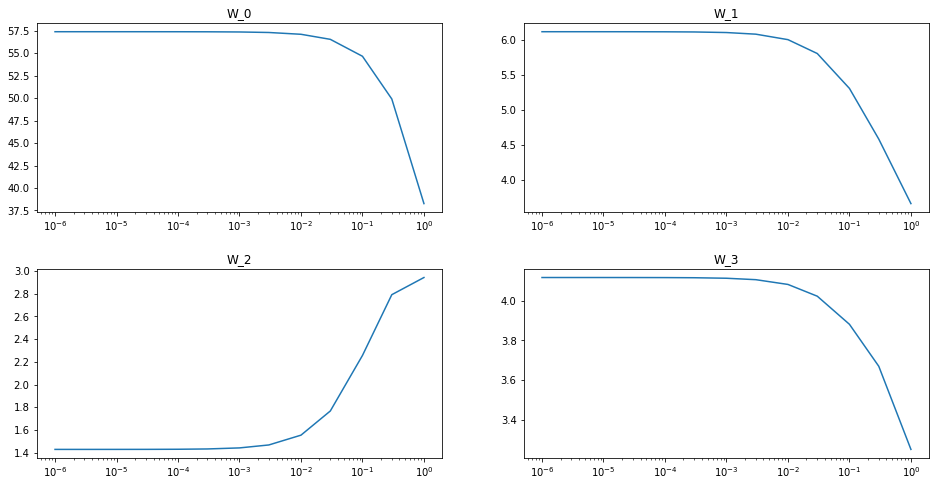

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False)
fig.set_size_inches(16, 8)
plt.subplots_adjust(hspace=0.3)

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set(title='W_0')
ax2.set(title='W_1')
ax3.set(title='W_2')
ax4.set(title='W_3')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

lambda_list = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1]
reg2 = np.array([eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=ii) for ii in lambda_list])

ax1.plot(lambda_list, reg2[:, 0])
ax2.plot(lambda_list, reg2[:, 1])
ax3.plot(lambda_list, reg2[:, 2])
ax4.plot(lambda_list, reg2[:, 3])

### Задание 2.2.

 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Ответ: нет, нельзя (т.е. применить формулы друг за другом можно, но смысл полученного не ясен)

### Задание 2.3.

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

L1 регуляризация - Lasso

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

Производная от (lambda_/2) * (np.abs(W)) = (lambda_/2) * W / (np.abs(W))

W / (np.abs(W) = np.sign(W) - просто знак от W

In [10]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 0.5 * lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [11]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

500 [57.3951657   5.107012    2.45935865  4.08593416] 39.98160054078165
1000 [57.3974999   5.76556011  1.85551575  4.03811363] 39.80715672262111
1500 [57.3975      5.9905487   1.60364693  4.06807851] 39.782364096486816
2000 [57.3975      6.07158943  1.4997405   4.09226723] 39.77850665723454
2500 [57.3975      6.10198804  1.45714738  4.10501616] 39.77788266915648
3000 [57.3975      6.11372206  1.439753    4.11090584] 39.777779878507715
3500 [57.3975      6.11833878  1.43266516  4.11347112] 39.77776268983728
4000 [57.3975      6.12017758  1.42978082  4.11455514] 39.777759742440374
4500 [57.3975      6.12091557  1.42860799  4.11500567] 39.777759209634766
5000 [57.3975      6.12121316  1.42813132  4.11519115] 39.77775910272766


array([57.3975    ,  6.12121316,  1.42813132,  4.11519115])